# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 7 - Lab 02: Cross-Validation & Model Comparison
**Instructor:** Amir Charkhi | **Type:** Hands-On Practice

> Practice what you learned in Notebook 03

## 🎯 Lab Objectives

In this lab, you'll practice:
- Implementing K-fold cross-validation
- Using stratified cross-validation
- Comparing multiple models fairly
- Understanding when to use which CV strategy

**Time**: 25-35 minutes  
**Difficulty**: ⭐⭐⭐☆☆ (Intermediate)

---

## 📚 Quick Reference

**Cross-Validation:**
```python
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Simple cross-validation
scores = cross_val_score(model, X, y, cv=5)

# Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)
```

---

In [1]:
# Setup - Run this cell first!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import (
    train_test_split, cross_val_score, StratifiedKFold, KFold
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
print("✅ Setup complete! Let's practice cross-validation!")

✅ Setup complete! Let's practice cross-validation!


---

## 📊 Exercise 1: Basic Cross-Validation

Let's start with simple K-fold cross-validation!

### Task 1.1: Load Data and Simple CV

In [2]:
# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

print(f"Dataset: {len(X)} wine samples, {len(np.unique(y))} classes")

# TODO 1.1: Perform 5-fold cross-validation
# Steps:
#   1. Create a LogisticRegression model (max_iter=1000)
#   2. Use cross_val_score with cv=5
#   3. Calculate mean and std of scores

# Your code here:
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model,X,y,cv=5)

mean_score = np.mean(cv_scores)
std_score = np.std(cv_scores)

# Validation (Don't modify)
print(f"\n5-Fold CV Scores: {cv_scores}")
print(f"Mean: {mean_score:.4f}")
print(f"Std:  {std_score:.4f}")
print(f"\nResult: {mean_score:.4f} ± {std_score:.4f}")

if len(cv_scores) == 5:
    print("\n✅ Correct! You performed 5-fold CV")
    print("🎉 Task 1.1 Complete!")
else:
    print("\n❌ Should have 5 scores - check your cv parameter")

Dataset: 178 wine samples, 3 classes

5-Fold CV Scores: [0.91666667 0.94444444 0.94444444 1.         1.        ]
Mean: 0.9611
Std:  0.0333

Result: 0.9611 ± 0.0333

✅ Correct! You performed 5-fold CV
🎉 Task 1.1 Complete!


### Task 1.2: Visualize Fold Performance

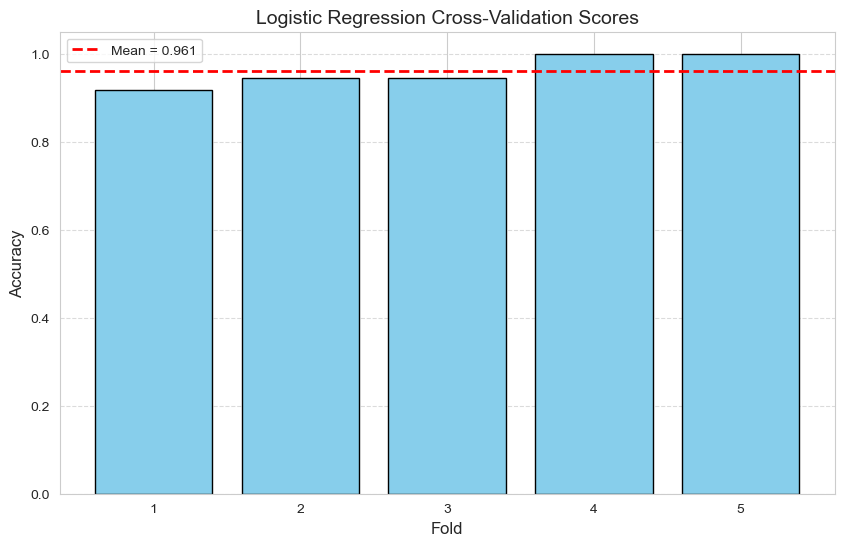

🎉 Task 1.2 Complete!


In [3]:
# TODO 1.2: Create a bar plot showing performance across folds
# Include a horizontal line showing the mean

# Your code here (plotting):
# Create bar plot of cv_scores
# Add a horizontal line at mean_score
# Add labels, title, and grid
# Validation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Create bar plot of cv_scores
plt.bar(range(1, len(cv_scores) + 1), cv_scores, color='skyblue', edgecolor='black')

# Add a horizontal line at mean_score
plt.axhline(mean_score, color='red', linestyle='--', linewidth=2, label=f"Mean = {mean_score:.3f}")

# Add labels, title, and grid
plt.title("Logistic Regression Cross-Validation Scores", fontsize=14)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.show()


print("🎉 Task 1.2 Complete!")

---

## 🎯 Exercise 2: Stratified vs Regular K-Fold

See the difference stratification makes!

### Task 2.1: Compare Both Approaches

In [3]:
# TODO 2.1: Compare regular K-Fold vs Stratified K-Fold
# Use the same model for both

model = LogisticRegression(max_iter=1000)

# Your code here:
# 1. Regular K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores_regular = scores = cross_val_score(model, X, y, cv=5)

# 2. Stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# cross_val_score with kfold_stratified
scores_stratified = cross_val_score(model, X, y, cv=cv)


# Validation (Don't modify)
print("Regular K-Fold:")
print(f"  Scores: {scores_regular}")
print(f"  Mean: {scores_regular.mean():.4f} ± {scores_regular.std():.4f}")

print("\nStratified K-Fold:")
print(f"  Scores: {scores_stratified}")
print(f"  Mean: {scores_stratified.mean():.4f} ± {scores_stratified.std():.4f}")

print(f"\n💡 Difference in std: {abs(scores_regular.std() - scores_stratified.std()):.4f}")
print("   Stratified usually has lower variance (more stable)")

if scores_stratified.std() <= scores_regular.std():
    print("\n✅ Stratified CV is more stable!")
    print("🎉 Task 2.1 Complete!")

Regular K-Fold:
  Scores: [0.91666667 0.94444444 0.94444444 1.         1.        ]
  Mean: 0.9611 ± 0.0333

Stratified K-Fold:
  Scores: [0.94444444 0.94444444 0.94444444 0.97142857 1.        ]
  Mean: 0.9610 ± 0.0221

💡 Difference in std: 0.0112
   Stratified usually has lower variance (more stable)

✅ Stratified CV is more stable!
🎉 Task 2.1 Complete!


### Task 2.2: Check Class Distribution in Folds

In [6]:
# TODO 2.2: Examine class distribution in each fold
# This shows WHY stratification matters

print("Original class distribution:")
print(pd.Series(y).value_counts(normalize=True).sort_index())

print("\nClass distribution in Stratified K-Fold:")

# Your code here:
# Loop through the folds and print class distribution in each test set
for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    y_test_fold = y[test_idx]  # Get y values for test_idx
    fold_distribution = pd.Series(y_test_fold).value_counts(normalize=True).sort_index()
    print(f"Fold {fold}:")
    print(fold_distribution)
    print("-" * 30)
    

print("\n💡 Notice: All folds have similar class proportions!")
print("🎉 Task 2.2 Complete!")

Original class distribution:
0    0.331461
1    0.398876
2    0.269663
Name: proportion, dtype: float64

Class distribution in Stratified K-Fold:
Fold 1:
0    0.333333
1    0.388889
2    0.277778
Name: proportion, dtype: float64
------------------------------
Fold 2:
0    0.333333
1    0.388889
2    0.277778
Name: proportion, dtype: float64
------------------------------
Fold 3:
0    0.333333
1    0.388889
2    0.277778
Name: proportion, dtype: float64
------------------------------
Fold 4:
0    0.342857
1    0.400000
2    0.257143
Name: proportion, dtype: float64
------------------------------
Fold 5:
0    0.314286
1    0.428571
2    0.257143
Name: proportion, dtype: float64
------------------------------

💡 Notice: All folds have similar class proportions!
🎉 Task 2.2 Complete!


---

## 🏆 Exercise 3: Comparing Multiple Models

Now let's compare several models using CV!

### Task 3.1: Evaluate Multiple Models

In [4]:
# TODO 3.1: Compare 4 different models using cross-validation
# Models: Logistic Regression, Decision Tree, Random Forest, KNN

# Load fresh dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Your code here:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    # Perform CV and store results
    scores = scores = cross_val_score(model, X, y, cv=cv) # cross_val_score
    results.append({
        'Model': name,
        'Mean': scores.mean(),
        'Std': scores.std()
    })

# Create DataFrame and sort by mean score
results_df = pd.DataFrame(results).sort_values('Mean', ascending=False)

# Validation (Don't modify)
print("Model Comparison (5-Fold Stratified CV):\n")
print(results_df.to_string(index=False))

best_model = results_df.iloc[0]['Model']
best_score = results_df.iloc[0]['Mean']

print(f"\n🏆 Winner: {best_model}")
print(f"   Score: {best_score:.4f}")
print("\n🎉 Task 3.1 Complete!")

Model Comparison (5-Fold Stratified CV):

              Model     Mean      Std
Logistic Regression 0.966667 0.029814
K-Nearest Neighbors 0.966667 0.029814
      Random Forest 0.953333 0.033993
      Decision Tree 0.946667 0.026667

🏆 Winner: Logistic Regression
   Score: 0.9667

🎉 Task 3.1 Complete!


### Task 3.2: Visualize Model Comparison

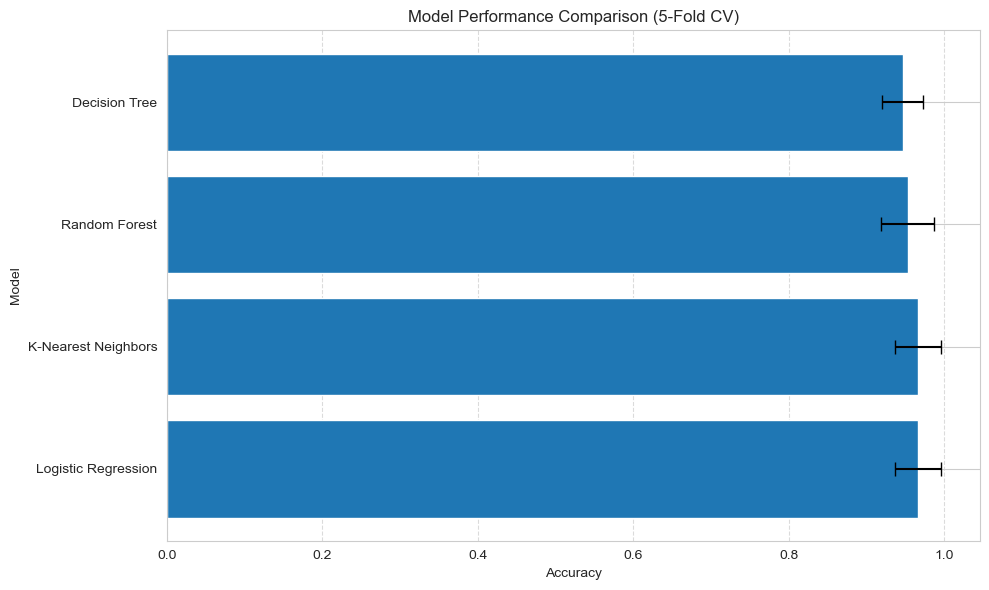

🎉 Task 3.2 Complete!


In [10]:
# TODO 3.2: Create a horizontal bar chart comparing models
# Include error bars showing standard deviation

# Your code here:
plt.figure(figsize=(10, 6))
# Create horizontal bar plot with error bars
plt.barh(
    results_df['Model'],
    results_df['Mean'],
    xerr=results_df['Std'],
    capsize=5
)

# Add title, labels, and grid
plt.title('Model Performance Comparison (5-Fold CV)')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


print("🎉 Task 3.2 Complete!")

---

## 🎯 Exercise 4: Understanding CV Scores

Let's dig deeper into what CV tells us!

### Task 4.1: Interpret CV Results

In [5]:
# Let's create two models with different characteristics
model_consistent = RandomForestClassifier(n_estimators=100, random_state=42)
model_unstable = DecisionTreeClassifier(max_depth=20, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores_consistent = cross_val_score(model_consistent, X, y, cv=cv)
scores_unstable = cross_val_score(model_unstable, X, y, cv=cv)

# TODO 4.1: Analyze and explain the difference
# Calculate mean and std for both, then interpret

# Your code here:
mean_cons = scores_consistent.mean()       # Mean of scores_consistent
std_cons = scores_consistent.std()         # Std of scores_consistent

mean_unstable = scores_unstable.mean()     # Mean of scores_unstable
std_unstable = scores_unstable.std()       # Std of scores_unstable

# Print comparison
print("Model Comparison:")
print(f"Random Forest:  {mean_cons:.4f} ± {std_cons:.4f}")
print(f"Decision Tree:  {mean_unstable:.4f} ± {std_unstable:.4f}")

# TODO: Fill in this interpretation
print("\nInterpretation:")
print("- Random Forest is an ensemble model, so it reduces variance and tends to give consistent results.")
print("- Decision Trees are high-variance models — small changes in data can lead to large changes in structure.")
print("- Therefore, the decision tree usually has:")
print("    • Higher standard deviation (less stable across folds)")
print("    • Often a slightly lower mean accuracy")

if std_cons < std_unstable:
    print("\n✅ Random Forest is more consistent across folds!")
    print("   Lower std = more stable predictions")
    print("🎉 Task 4.1 Complete!")

Model Comparison:
Random Forest:  0.9467 ± 0.0267
Decision Tree:  0.9533 ± 0.0340

Interpretation:
- Random Forest is an ensemble model, so it reduces variance and tends to give consistent results.
- Decision Trees are high-variance models — small changes in data can lead to large changes in structure.
- Therefore, the decision tree usually has:
    • Higher standard deviation (less stable across folds)
    • Often a slightly lower mean accuracy

✅ Random Forest is more consistent across folds!
   Lower std = more stable predictions
🎉 Task 4.1 Complete!


### Task 4.2: When is High Variance a Problem?

In [6]:
# TODO 4.2: Multiple choice - Select the correct answer
# When should you be concerned about high variance in CV scores?

# Options:
# A: "When std > 0.05"
# B: "When std is large relative to mean (e.g., std/mean > 0.1)"
# C: "Never - high variance is always fine"
# D: "Only when mean score is low"

your_answer = "B"  # Put A, B, C, or D

# Validation
correct_answer = "B"
explanation = """High variance relative to mean suggests the model's performance 
is inconsistent across different data splits. A std/mean ratio > 0.1 (10% coefficient 
of variation) is often considered concerning."""

if your_answer.upper() == correct_answer:
    print("✅ Correct!")
    print(explanation)
    print("\n🎉 Task 4.2 Complete!")
else:
    print(f"❌ Incorrect. The answer is {correct_answer}.")
    print(explanation)

✅ Correct!
High variance relative to mean suggests the model's performance 
is inconsistent across different data splits. A std/mean ratio > 0.1 (10% coefficient 
of variation) is often considered concerning.

🎉 Task 4.2 Complete!


---

## 🧪 Exercise 5: Putting It All Together

Final challenge: Complete ML workflow with CV!

### Task 5.1: Complete Evaluation Workflow

In [7]:
# TODO 5.1: Follow the complete best-practice workflow
# This combines everything you've learned!

# Load data
wine = load_wine()
X = wine.data
y = wine.target

print("Complete ML Evaluation Workflow")
print("="*50)

# Step 1: Split data (hold out test set)
# TODO: Split into 80% train, 20% test, stratified, random_state=42
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(f"\nStep 1: Data Split")
print(f"  Train: {len(X_train)} samples")
print(f"  Test:  {len(X_test)} samples (LOCKED)")

# Step 2: Compare models using CV on training data only!
print(f"\nStep 2: Model Selection (CV on training data)")

models_to_try = {
    'Logistic': LogisticRegression(max_iter=200),
    'Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Forest': RandomForestClassifier(n_estimators=50, random_state=42)
}

# TODO: Use StratifiedKFold, evaluate each model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Create StratifiedKFold
best_score = 0
best_model_name = None
best_model = None

for name, model in models_to_try.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv) # CV scores
    mean = scores.mean()
    print(f"  {name}: {mean:.4f} ± {scores.std():.4f}")
    
    if mean > best_score:
        best_score = mean
        best_model_name = name
        best_model = model

print(f"\n  → Selected: {best_model_name}")

# Step 3: Train best model on full training set
print(f"\nStep 3: Training {best_model_name} on full training set")
# TODO: Fit best_model on X_train, y_train
best_model.fit(X_train, y_train)

# Step 4: Evaluate ONCE on test set
print(f"\nStep 4: Final Evaluation on Test Set")
# TODO: Make predictions and calculate accuracy
y_pred = best_model.predict(X_test) # Predict on X_test
test_accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy

print(f"  Test Accuracy: {test_accuracy:.4f}")

# Validation
print("\n" + "="*50)
if test_accuracy > 0.8:
    print("\n✅ Excellent workflow! Model performs well.")
    print("\n💡 Key Points:")
    print("  - Used CV to SELECT model (on training data)")
    print("  - Held out test set until the end")
    print("  - Evaluated ONCE on test set")
    print("\n🎉 Task 5.1 Complete!")
    print("🎉 Lab 02 Complete!")
else:
    print(f"\n⚠️ Test accuracy is {test_accuracy:.1%} - check your code")

Complete ML Evaluation Workflow

Step 1: Data Split
  Train: 142 samples
  Test:  36 samples (LOCKED)

Step 2: Model Selection (CV on training data)
  Logistic: 0.9160 ± 0.0726
  Tree: 0.9022 ± 0.0586
  Forest: 0.9722 ± 0.0403

  → Selected: Forest

Step 3: Training Forest on full training set

Step 4: Final Evaluation on Test Set
  Test Accuracy: 1.0000


✅ Excellent workflow! Model performs well.

💡 Key Points:
  - Used CV to SELECT model (on training data)
  - Held out test set until the end
  - Evaluated ONCE on test set

🎉 Task 5.1 Complete!
🎉 Lab 02 Complete!


---

## 🏆 Lab Complete!

### What You Practiced:

✅ **Exercise 1**: Basic K-fold cross-validation  
✅ **Exercise 2**: Stratified vs regular K-fold  
✅ **Exercise 3**: Comparing multiple models  
✅ **Exercise 4**: Interpreting CV results  
✅ **Exercise 5**: Complete evaluation workflow  

### Key Takeaways:

1. **Always use StratifiedKFold** for classification
2. **CV gives mean ± std** - both matter!
3. **High variance = unstable** model
4. **Use CV for selection**, test set for final evaluation
5. **Never touch test set** during model development

### The Golden Workflow:

```python
1. Split: Train (80%) + Test (20%) - LOCK test set
2. Use CV on training set to compare models
3. Select best model based on CV results
4. Train best model on full training set
5. Evaluate ONCE on test set - this is your final score
```

### Next Steps:

- Try **Lab 03** for mini-project practice
- Experiment with different K values (3, 5, 10)
- Compare models on your own datasets

**Excellent work! 🎉**